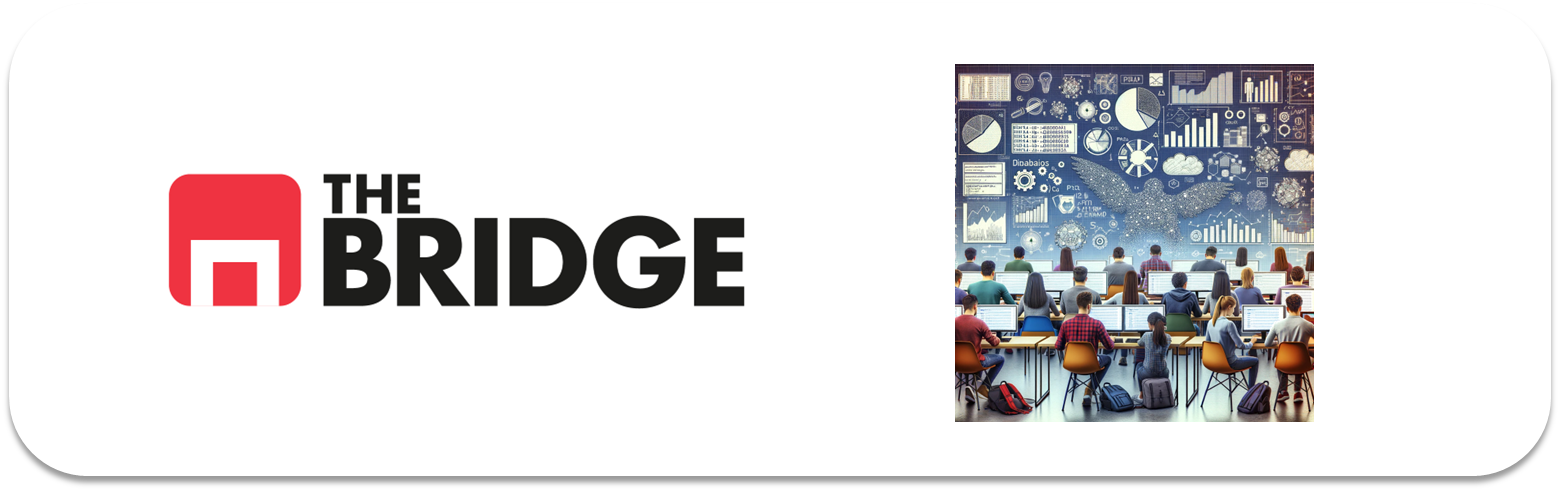

# PRÁCTICA OBLIGATORIA
## Clasificación y Regresión Logística

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [476]:
from scipy import stats

from sklearn import preprocessing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use(["dark_background"])
pd.options.mode.copy_on_write = True

In [477]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados.

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

> Los pasos para guiar el trabajo:
> 1. Carga el dataset del Titanic.
> 2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
> 3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
> 4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
> 5. Construye las parejas X, y de train y test.
> 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
> 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
> 8. Trata las variables para que funcionen lo mejor posible en el modelo.
> 9. Construye un modelo de regresión logística.
> 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
> 11. Procesa el dataset de Test para que puedas usarlo en la evaluación.
> 12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
> 13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
> 14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.

## Titanic

In [478]:
print("Registros:", df_titanic.shape[0])
print("Columnas:", df_titanic.shape[1])
print("="*50)

df_titanic.info()

Registros: 891
Columnas: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Análisis de Columnas

In [479]:
records = df_titanic.shape[0]
for column in df_titanic.columns.values:
	print(column.upper())
	print("-"*30)
	unique = df_titanic[column].nunique()
	print(f"-cardinalidad: {unique}")
	print(f"-unicidad: {unique/records * 100:.2f}%")
	empty = df_titanic[column].isna().sum()
	print(f"-valores nulos: {empty} ({empty/records * 100:.2f}%)")
	print("\n")

SURVIVED
------------------------------
-cardinalidad: 2
-unicidad: 0.22%
-valores nulos: 0 (0.00%)


PCLASS
------------------------------
-cardinalidad: 3
-unicidad: 0.34%
-valores nulos: 0 (0.00%)


SEX
------------------------------
-cardinalidad: 2
-unicidad: 0.22%
-valores nulos: 0 (0.00%)


AGE
------------------------------
-cardinalidad: 88
-unicidad: 9.88%
-valores nulos: 177 (19.87%)


SIBSP
------------------------------
-cardinalidad: 7
-unicidad: 0.79%
-valores nulos: 0 (0.00%)


PARCH
------------------------------
-cardinalidad: 7
-unicidad: 0.79%
-valores nulos: 0 (0.00%)


FARE
------------------------------
-cardinalidad: 248
-unicidad: 27.83%
-valores nulos: 0 (0.00%)


EMBARKED
------------------------------
-cardinalidad: 3
-unicidad: 0.34%
-valores nulos: 2 (0.22%)


CLASS
------------------------------
-cardinalidad: 3
-unicidad: 0.34%
-valores nulos: 0 (0.00%)


WHO
------------------------------
-cardinalidad: 3
-unicidad: 0.34%
-valores nulos: 0 (0.00%)


ADU

### 2) Limpieza general
**2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones**

`deck` tiene un 77% de valores nulos. Es una variable a eliminar del dataset. `embarked` y `embarked_town` tienen la misma información representada de forma diferente. Nos quedaremos con una de ellas para evitar generar ruido en el modelo. `adult_male` es una variable que posee la información extraída de otras columnas, en mi consideración, es una variable que dupilca información que se encuentra en el dataset, por lo que puede generar ruido en el modelo.

In [480]:
to_delete = ["deck", "adult_male", "embarked"]
df_titanic.drop(columns=to_delete, inplace=True)
df_titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone
635,1,2,female,28.0,0,0,13.0,Second,woman,Southampton,yes,True
333,0,3,male,16.0,2,0,18.0,Third,man,Southampton,no,False


### 3) Target
**3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.**

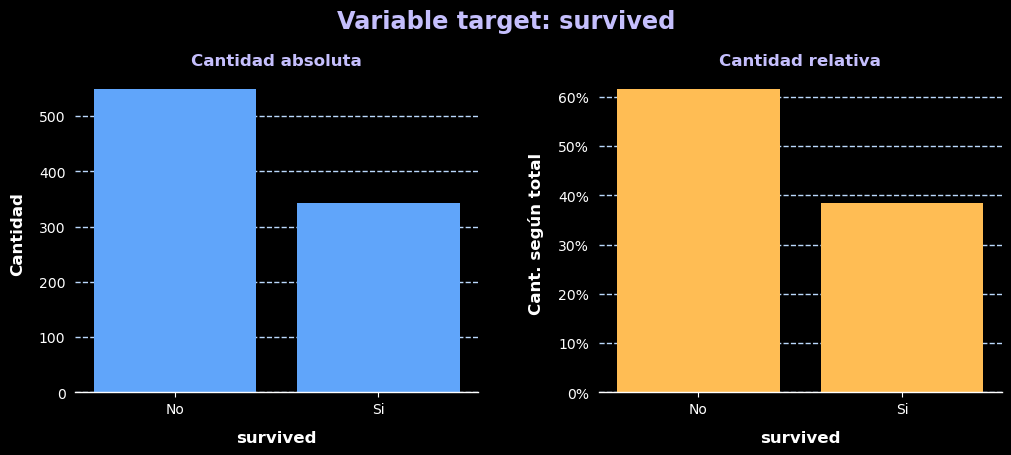

In [481]:
from matplotlib import ticker

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable target: survived",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Cantidad absoluta",
				 color="#C5BFFD",
				 fontdict=font_config)

data = df_titanic["survived"].value_counts()
axs[0].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#60A5FA",
		   zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].tick_params(axis="y", width=0)
axs[0].set_xticks(ticks=data.index, labels=["No", "Si"])
axs[0].set_xlabel("survived", labelpad=10, fontdict=font_config)

axs[0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Cantidad relativa",
				 color="#C5BFFD",
				 fontdict=font_config)


data = df_titanic["survived"].value_counts(normalize=True)
axs[1].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#FFBD54",
		   zorder=2)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_xticks(ticks=data.index, labels=["No", "Si"])
axs[1].set_xlabel("survived", labelpad=10, fontdict=font_config)

axs[1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1].tick_params(axis="y", width=0)
axs[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

### 4) y 5) Split en Training y Test

**4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.**

In [482]:
from sklearn.model_selection import train_test_split

Realizamos una separación de 80% de los registros para `training` set y el 20% restante para ser de `test` set.

In [483]:
df_training, df_test = train_test_split(df_titanic,
										test_size=.2,
										stratify=df_titanic["survived"],
										random_state=99)

In [484]:
print("="*35)
records = df_training.shape[0]
print(f"Training set info: {records} registros")
print("-"*35)
data = df_training["survived"].value_counts()
print(f"-survived:")
for value in data.index:
	print(f"\t{value}: {data[value]} ({data[value]/records:.2f}%)")

print("="*35)

records = df_test.shape[0]
print(f"Test set info: {records} registros")
print("-"*35)
data = df_test["survived"].value_counts()
print(f"-survived:")
for value in data.index:
	print(f"\t{value}: {data[value]} ({data[value]/records:.2f}%)")
print("="*35)

Training set info: 712 registros
-----------------------------------
-survived:
	0: 439 (0.62%)
	1: 273 (0.38%)
Test set info: 179 registros
-----------------------------------
-survived:
	0: 110 (0.61%)
	1: 69 (0.39%)


Notamos que hay un pequeño desbalance en nuestro `target`.

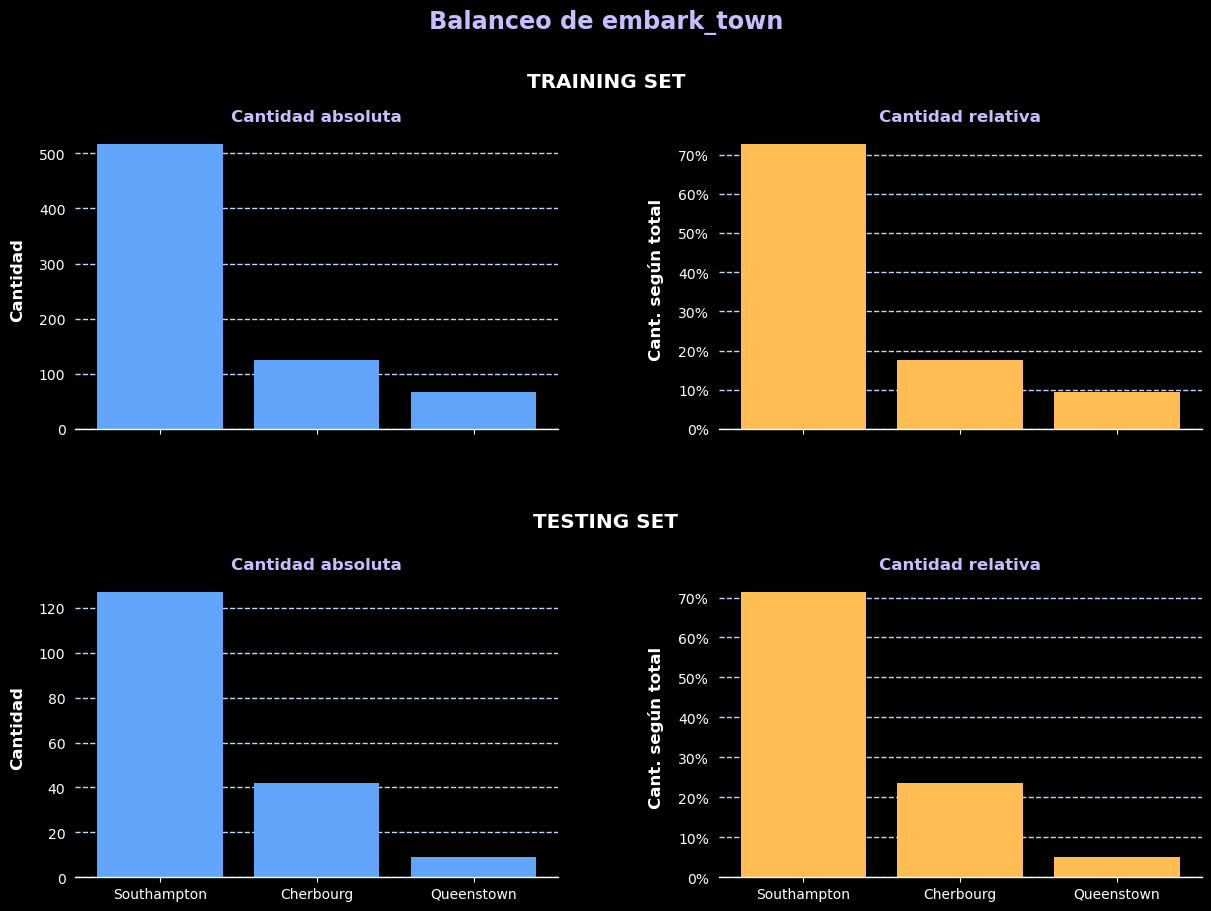

In [485]:
fig, axs = plt.subplots(nrows=2,
						ncols=2,
						figsize=(12, 8),
						sharex=True,
						layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Balanceo de embark_town",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "TRAINING SET",
		 va="center",
		 ha="center",
		 fontdict=font_config)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["embark_town"].value_counts()
axs[0][0].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#60A5FA",
		   zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
#axs[0][0].set_xticks(ticks=data.index, labels=["No", "Si"])
#axs[0][0].set_xlabel("embark_town", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa",
				 color="#C5BFFD",
				 fontdict=font_config)


data = df_training["embark_town"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#FFBD54",
		   zorder=2)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
#axs[0][1].set_xticks(ticks=data.index, labels=["No", "Si"])
#axs[0][1].set_xlabel("embark_town", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "TESTING SET",
		 va="center",
		 ha="center",
		 fontdict=font_config)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta",
				 color="#C5BFFD",
				 fontdict=font_config)

data = df_test["embark_town"].value_counts()
axs[1][0].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#60A5FA",
		   zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].tick_params(axis="y", width=0)
#axs[1][0].set_xticks(ticks=data.index, labels=["No", "Si"])
#axs[1][0].set_xlabel("embark_town", labelpad=10, fontdict=font_config)

axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[1][0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)


data = df_test["embark_town"].value_counts(normalize=True)
axs[1][1].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#FFBD54",
		   zorder=2)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
#axs[1][1].set_xticks(ticks=data.index, labels=["No", "Si"])
#axs[1][1].set_xlabel("embark_town", labelpad=10, fontdict=font_config)

axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].tick_params(axis="y", width=0)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.3, wspace=0.15)
plt.show()

Analizando el balanceo de `embark_town`, notamos que contamos con más del 70% de registros de `Southampton` respecto a las otras ciudades aunque la proporcionalidad se encuentra equilibrada en los datos de testing y training.

### 6) Imputar nulos
**6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.**

In [486]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 53 to 524
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          563 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   class        712 non-null    object 
 8   who          712 non-null    object 
 9   embark_town  711 non-null    object 
 10  alive        712 non-null    object 
 11  alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 67.4+ KB


In [487]:
df_training.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,563.000000,712.000000,712.000000,712.000000
mean,0.383427,2.294944,30.423766,0.507022,0.376404,32.594837
std,0.486563,0.843659,14.467305,1.086915,0.810552,48.828245
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.479150
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Imputamos la **moda** en `embark_town`.

In [488]:
mode = df_training["embark_town"].mode()[0]
embark_town_mode = mode
print("La moda de EMBARK_TOWN es", mode)

La moda de EMBARK_TOWN es Southampton


In [489]:
is_nan = df_training["embark_town"].isna()
imputations = df_training.loc[is_nan, "embark_town"].apply(lambda x: mode)

df_training.fillna(value={"embark_town": imputations}, inplace=True)
df_training.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone
664,1,3,male,20.0,1,0,7.9250,Third,man,Southampton,yes,False
513,1,1,female,54.0,1,0,59.4000,First,woman,Cherbourg,yes,False
687,0,3,male,19.0,0,0,10.1708,Third,man,Southampton,no,True
259,1,2,female,50.0,0,1,26.0000,Second,woman,Southampton,yes,False
436,0,3,female,21.0,2,2,34.3750,Third,woman,Southampton,no,False


Imputamos en `age` la **mediana** agrupada según `who`.

In [490]:
median = df_training.groupby("who")["age"].median()

print("La mediana de AGE según WHO es:")
for i, k in enumerate(median):
	print(f"\t{median.index[i].upper()}: {k} años")

La mediana de AGE según WHO es:
	CHILD: 5.0 años
	MAN: 31.0 años
	WOMAN: 30.0 años


In [491]:
is_woman = df_training["who"] == "woman"
age_is_nan = df_training["age"].isna()
mask = is_woman & age_is_nan

woman_median = df_training.loc[is_woman, "age"].median()

imputations = df_training.loc[mask, "age"].apply(lambda x: median["woman"])
df_training.fillna(value={"age": imputations}, inplace=True)
df_training.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone
115,0,3,male,21.0,0,0,7.925,Third,man,Southampton,no,True
152,0,3,male,55.5,0,0,8.050,Third,man,Southampton,no,True


In [492]:
is_man = df_training["who"] == "man"
age_is_nan = df_training["age"].isna()
mask = is_man & age_is_nan

man_median = df_training.loc[is_man, "age"].median()

imputations = df_training.loc[mask, "age"].apply(lambda x: median["man"])
df_training.fillna(value={"age": imputations}, inplace=True)
df_training.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone
644,1,3,female,0.75,2,1,19.2583,Third,child,Cherbourg,yes,False
482,0,3,male,50.00,0,0,8.0500,Third,man,Southampton,no,True


Si verificamos, la mediana para los hombres y para las mujeres es igual.

In [493]:
print("Mediana para el grupo de mujeres:", woman_median)
print("Mediana para el grupo de hombres:", man_median)

Mediana para el grupo de mujeres: 30.0
Mediana para el grupo de hombres: 31.0


In [494]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 53 to 524
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   class        712 non-null    object 
 8   who          712 non-null    object 
 9   embark_town  712 non-null    object 
 10  alive        712 non-null    object 
 11  alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 67.4+ KB


Repetimos en nuestro dataset de test las imputaciones con los valores de nuestro training.

In [495]:
df_test.fillna(value={"embark_town": embark_town_mode}, inplace=True)
df_test["age"] = df_test["age"].fillna(value=30.0)

In [496]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 505 to 575
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     179 non-null    int64  
 1   pclass       179 non-null    int64  
 2   sex          179 non-null    object 
 3   age          179 non-null    float64
 4   sibsp        179 non-null    int64  
 5   parch        179 non-null    int64  
 6   fare         179 non-null    float64
 7   class        179 non-null    object 
 8   who          179 non-null    object 
 9   embark_town  179 non-null    object 
 10  alive        179 non-null    object 
 11  alone        179 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 17.0+ KB


### 7) Mini-EDA
**7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.**

In [497]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 53 to 524
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   class        712 non-null    object 
 8   who          712 non-null    object 
 9   embark_town  712 non-null    object 
 10  alive        712 non-null    object 
 11  alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 67.4+ KB


#### Análisis de `PCLASS`

In [498]:
def target_groupby_category(target, category, dataframe, relative=False):
	data = dataframe.groupby(by=[target, category]).size().unstack().fillna(0)

	if relative:
		return data.div(data.sum(axis=1), axis=0).round(3)

	return data

target_groupby_category("survived", "pclass", df_training, relative=True)

pclass,1,2,3
survived,,,
0,0.153,0.182,0.665
1,0.410,0.234,0.355


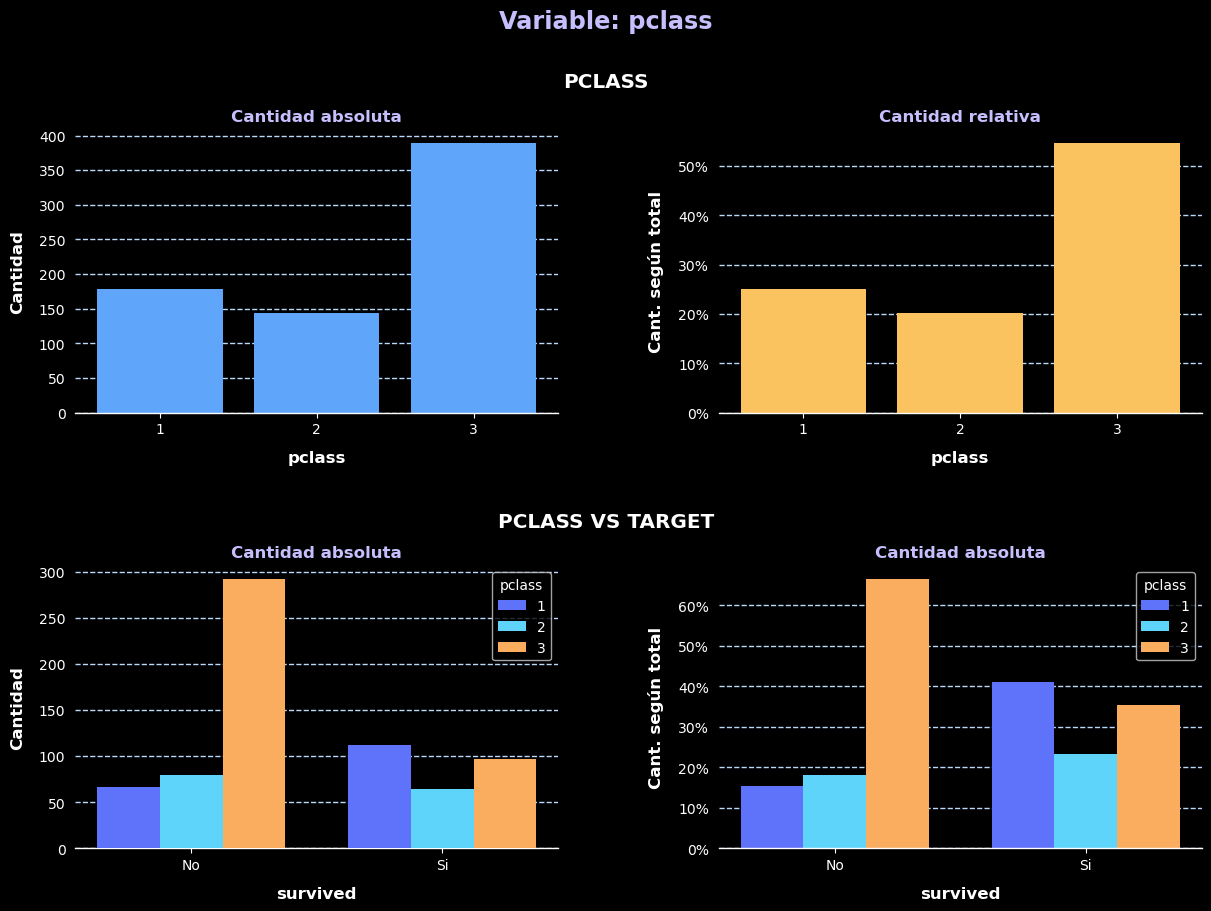

In [499]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: pclass",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "PCLASS",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["pclass"].value_counts()
axs[0][0].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#5FA5FA",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
axs[0][0].set_xticks(ticks=data.index)
axs[0][0].set_xlabel("pclass", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)


data = df_training["pclass"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][1].set_xticks(ticks=data.index)
axs[0][1].set_xlabel("pclass", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)



##
# CATEGORY VS TARGET
##
colors = ["#5F72FA", "#5FD4FA", "#FAAC5F", "#FAD65F", "#6C6E7A", "#7A756C"]
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "PCLASS VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "pclass", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + width, labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="pclass")




colors = ["#5F72FA", "#5FD4FA", "#FAAC5F", "#FAD65F", "#6C6E7A", "#7A756C"]
font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "pclass", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + width, labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="pclass")


fig.get_layout_engine().set(hspace=0.2, wspace=0.15)
plt.show()

#### Análisis de CLASS

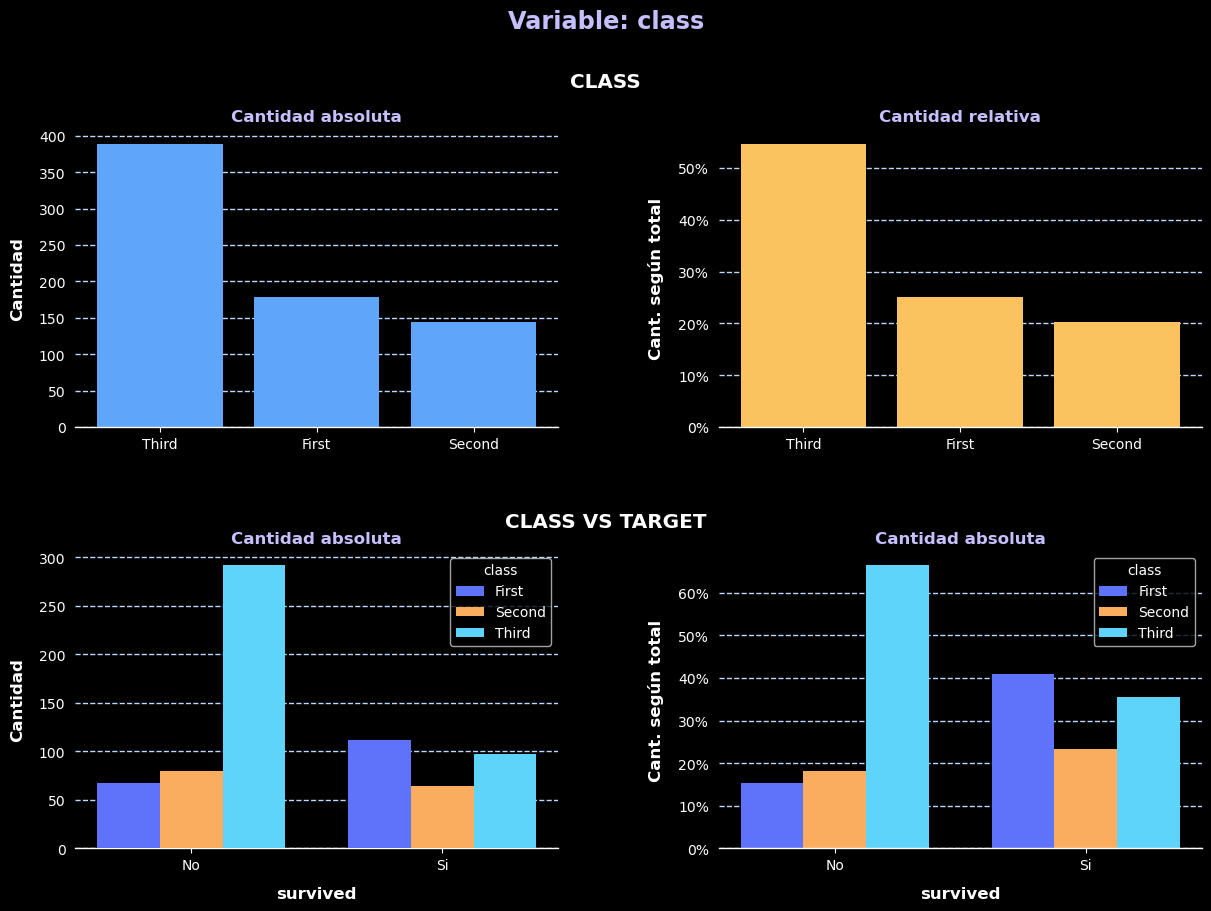

In [500]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: class",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "CLASS",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["class"].value_counts()
axs[0][0].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#5FA5FA",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
axs[0][0].set_xticks(ticks=data.index)
#axs[0][0].set_xlabel("class", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)

data = df_training["class"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][1].set_xticks(ticks=data.index)
#axs[0][1].set_xlabel("class", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)



##
# CATEGORY VS TARGET
##
colors = ["#5F72FA", "#FAAC5F", "#5FD4FA", "#FAD65F", "#6C6E7A", "#7A756C"]

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "CLASS VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "class", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + width, labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="class")





font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "class", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + width, labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="class")

fig.get_layout_engine().set(hspace=0.2, wspace=0.15)
plt.show()

#### Análisis de `SEX`

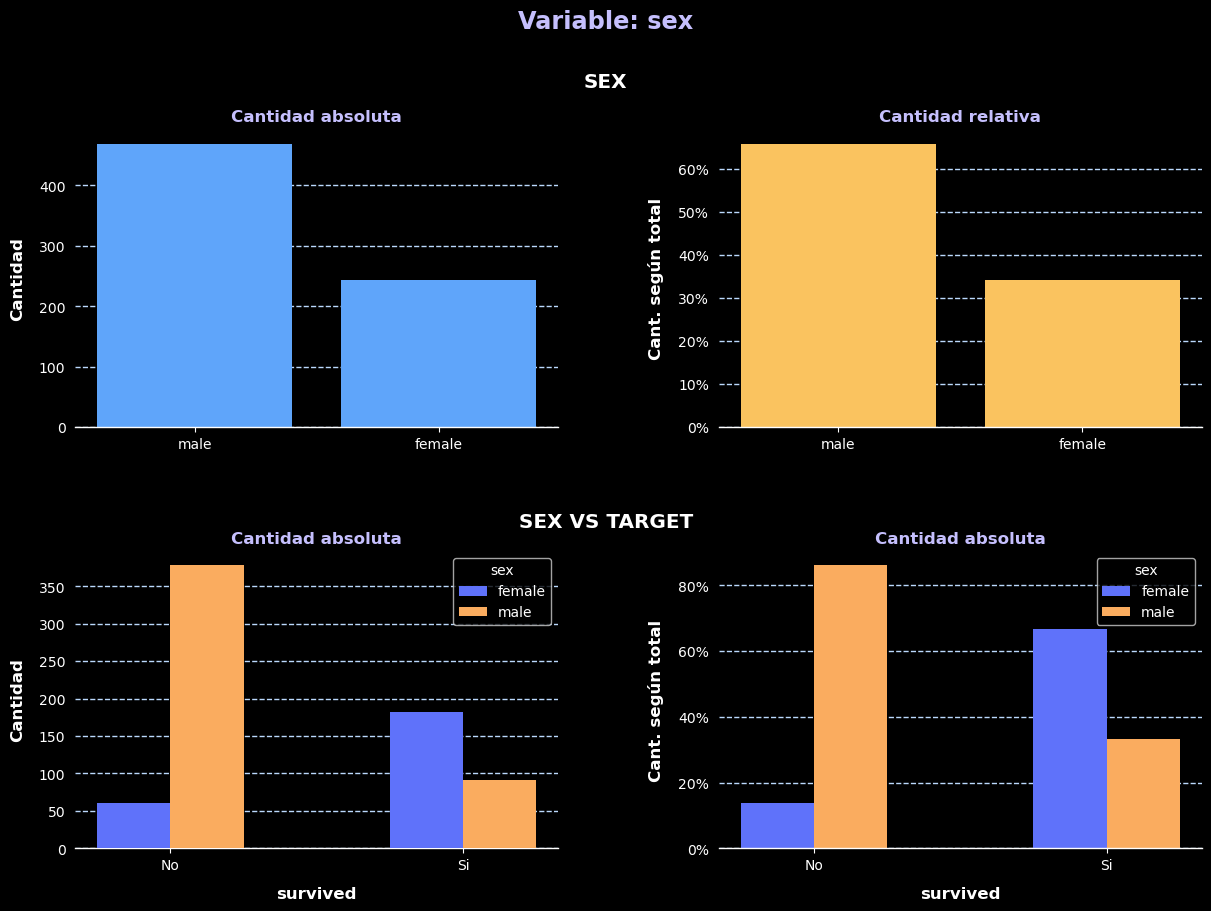

In [501]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: sex",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "SEX",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["sex"].value_counts()
axs[0][0].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#5FA5FA",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
axs[0][0].set_xticks(ticks=data.index)
#axs[0][0].set_xlabel("sex", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)

data = df_training["sex"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][1].set_xticks(ticks=data.index)
#axs[0][1].set_xlabel("sex", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)



##
# CATEGORY VS TARGET
##
colors = ["#5F72FA", "#FAAC5F", "#5FD4FA", "#FAD65F", "#6C6E7A", "#7A756C"]

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "SEX VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "sex", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + (width/2), labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="sex")





font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "sex", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + (width/2), labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="sex")


fig.get_layout_engine().set(hspace=0.2, wspace=0.15)
plt.show()

#### Análisis de `WHO`

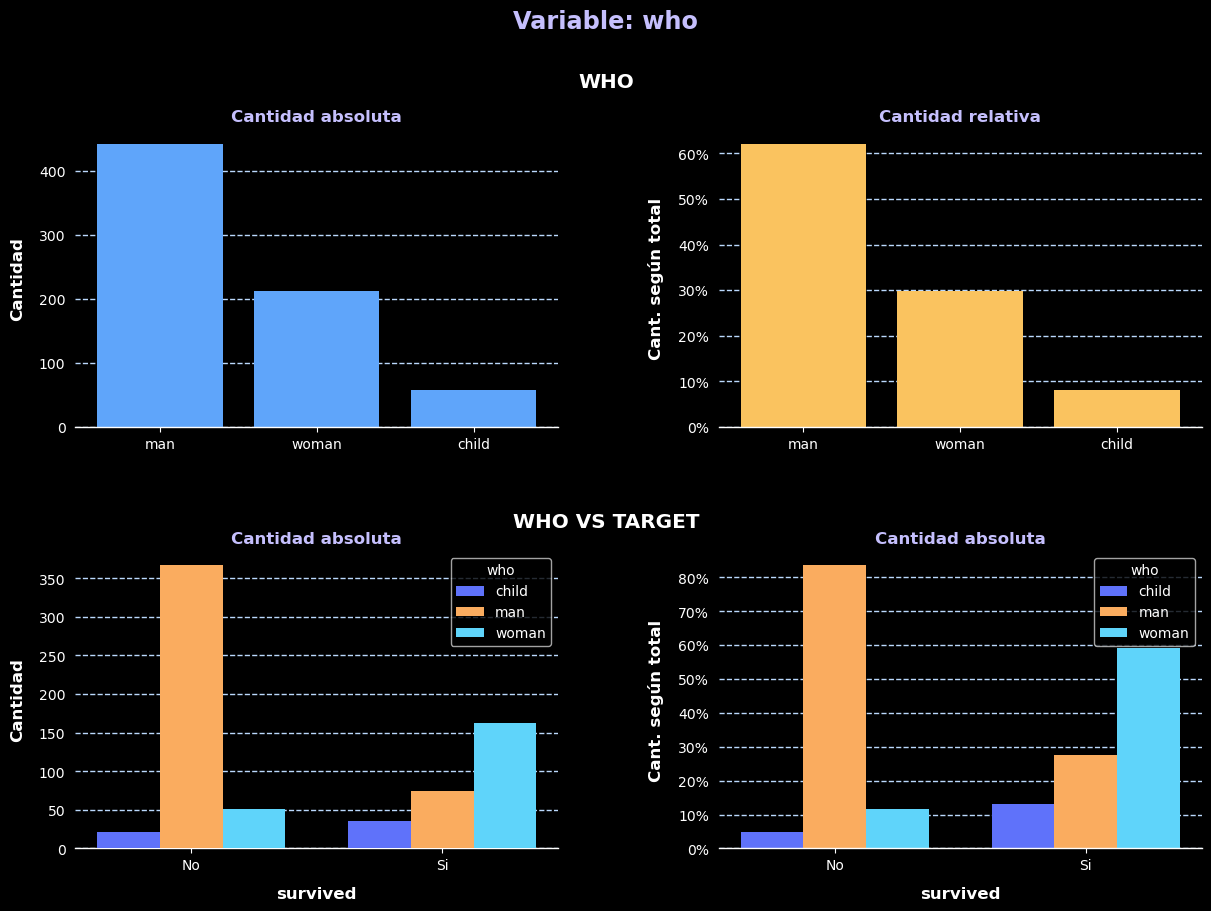

In [502]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: who",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "WHO",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["who"].value_counts()
axs[0][0].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#5FA5FA",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
axs[0][0].set_xticks(ticks=data.index)
#axs[0][0].set_xlabel("who", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)

data = df_training["who"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][1].set_xticks(ticks=data.index)
#axs[0][1].set_xlabel("who", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)



##
# CATEGORY VS TARGET
##
colors = ["#5F72FA", "#FAAC5F", "#5FD4FA", "#FAD65F", "#6C6E7A", "#7A756C"]

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "WHO VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "who", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + width, labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="who")





font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "who", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + width, labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="who")


fig.get_layout_engine().set(hspace=0.2, wspace=0.15)
plt.show()

#### Análisis de `EMBARK_TOWN`

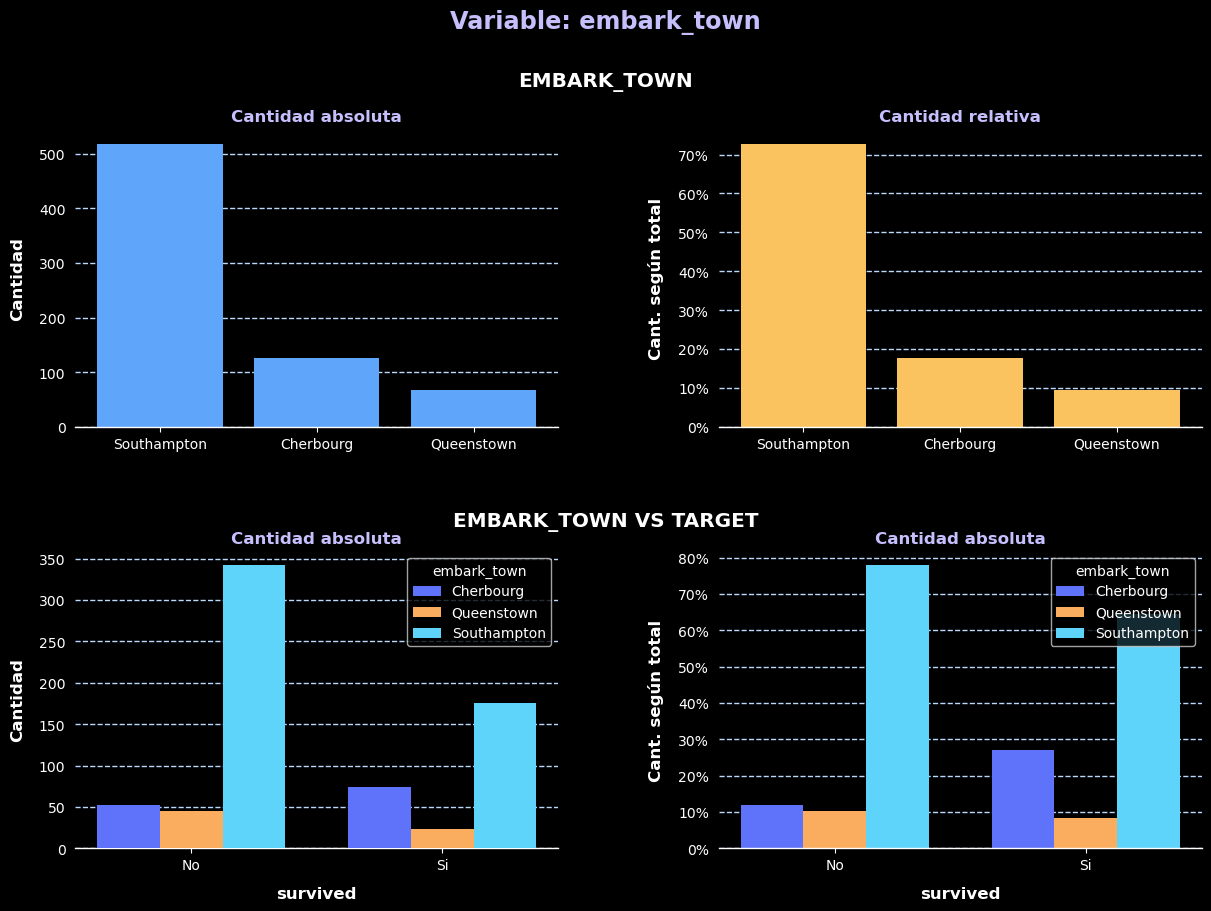

In [503]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: embark_town",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "EMBARK_TOWN",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["embark_town"].value_counts()
axs[0][0].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#5FA5FA",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
axs[0][0].set_xticks(ticks=data.index)
#axs[0][0].set_xlabel("embark_town", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)

data = df_training["embark_town"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][1].set_xticks(ticks=data.index)
#axs[0][1].set_xlabel("embark_town", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)



##
# CATEGORY VS TARGET
##
colors = ["#5F72FA", "#FAAC5F", "#5FD4FA", "#FAD65F", "#6C6E7A", "#7A756C"]

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "EMBARK_TOWN VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "embark_town", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + width, labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="embark_town")





font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "embark_town", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + width, labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="embark_town")

fig.get_layout_engine().set(hspace=0.2, wspace=0.15)
plt.show()

#### Análisis de `ALONE`

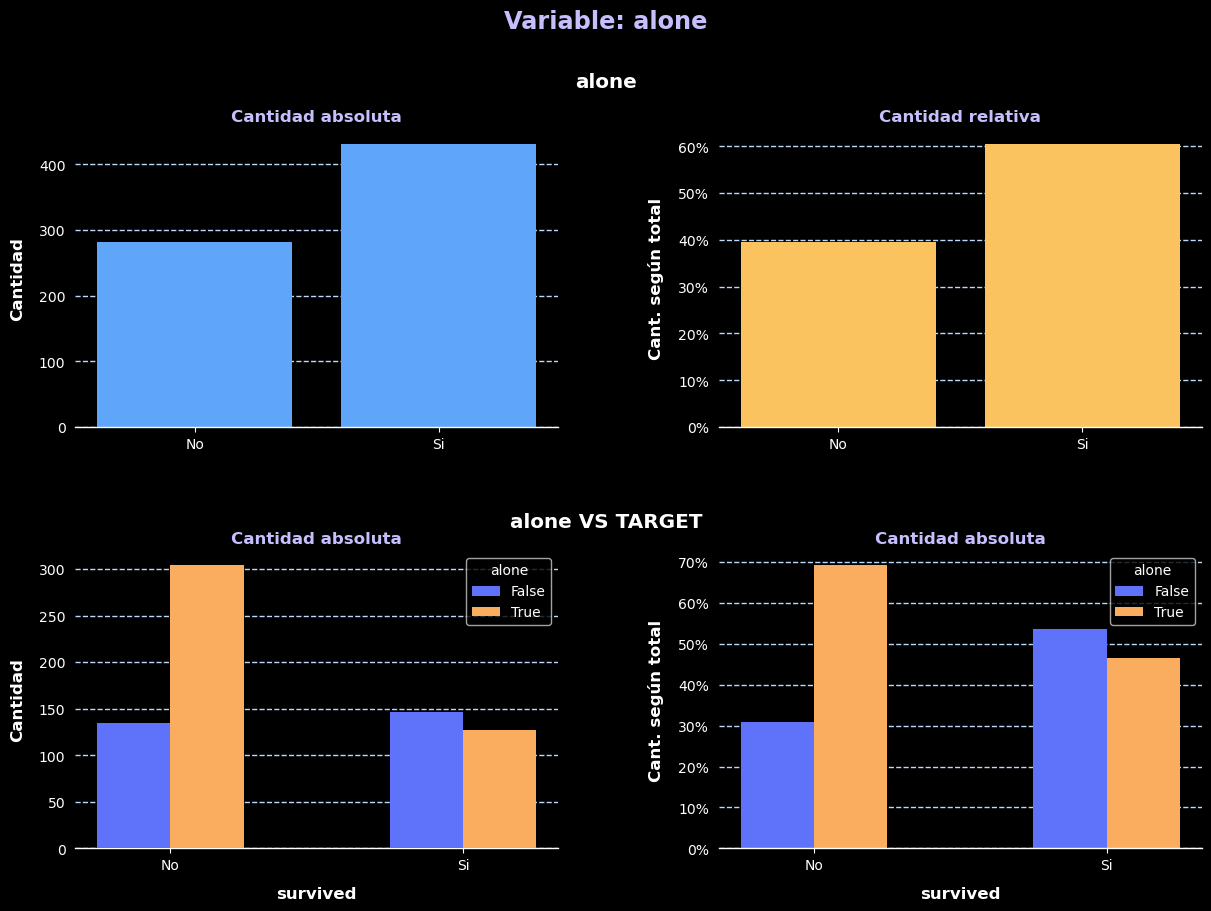

In [504]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: alone",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "alone",
		 va="center",
		 ha="center",
		 fontdict=font_config)


############
# CATEGORY #
############
font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["alone"].value_counts()
axs[0][0].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#5FA5FA",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="y", width=0)
axs[0][0].set_xticks(ticks=data.index, labels=["Si", "No"])
#axs[0][0].set_xlabel("alone", labelpad=10, fontdict=font_config)

axs[0][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["left", "top", "right"]].set_visible(False)
axs[0][0].spines["bottom"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)

data = df_training["alone"].value_counts(normalize=True)
axs[0][1].bar(x=data.index,
			  height=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
#axs[0][1].set_xticks(ticks=data.index)
axs[0][1].set_xticks(ticks=data.index, labels=["Si", "No"])
#axs[0][1].set_xlabel("alone", labelpad=10, fontdict=font_config)

axs[0][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="y", width=0)
axs[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["left", "top", "right"]].set_visible(False)
axs[0][1].spines["bottom"].set_linewidth(1)




######################
# CATEGORY VS TARGET #
######################
colors = ["#5F72FA", "#FAAC5F", "#5FD4FA", "#FAD65F", "#6C6E7A", "#7A756C"]

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "alone VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "alone", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + width/2, labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="alone")





font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "alone", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.25
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + width/2, labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="alone")

fig.get_layout_engine().set(hspace=0.2, wspace=0.15)
plt.show()

#### Análisis de `AGE`

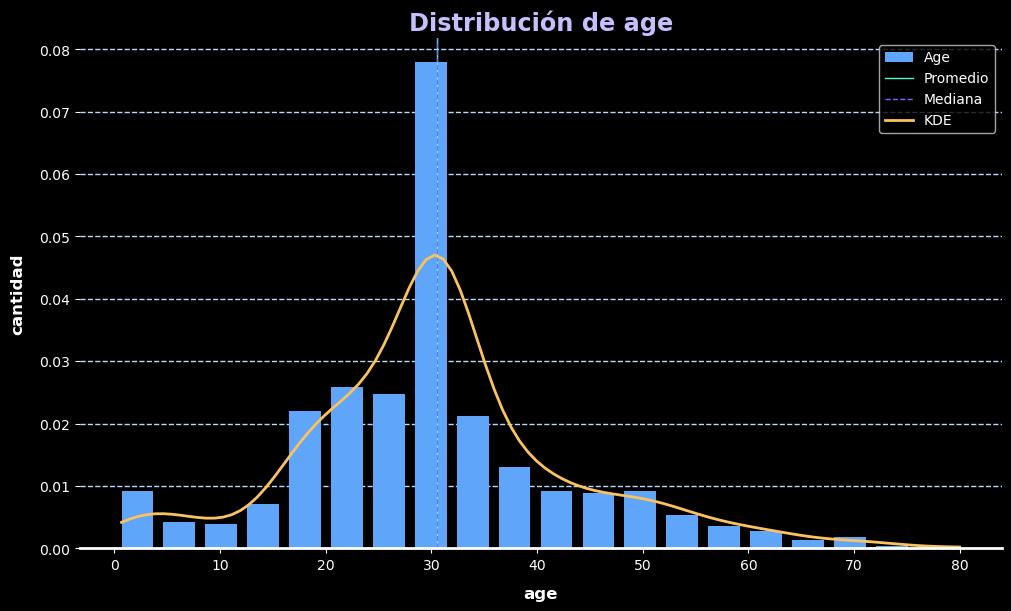

In [505]:
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
ax.set_title("Distribución de age", color="#C5BFFD", fontdict=font_config)
ax.hist(x="age",
		data=df_training,
		bins=20,
		density=True,
		color="#5FA5FA",
		label="Age",
		width=3,
		zorder=2)

age_mean = df_training["age"].mean()
ax.axvline(x=age_mean,
		   linestyle="solid",
		   linewidth=1,
		   color="#52FACC",
		   label="Promedio")

age_median = df_training["age"].median(),
ax.axvline(x=age_median,
		   linestyle="dashed",
		   linewidth=1,
		   color="#7969FB",
		   label="Mediana")

x = np.linspace(df_training["age"].min(), df_training["age"].max(), 100)
kde = stats.gaussian_kde(df_training["age"])
ax.plot(x, kde(x), color="#FAC35F", linewidth=2, label="KDE")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.set_xlabel("age", labelpad=10, fontdict=font_config)
ax.set_ylabel("cantidad", labelpad=10, fontdict=font_config)
ax.grid(axis="y", alpha=1, color="#BBD9FD", linestyle="dashed", linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.legend()

plt.show()

##### Categorización de age

In [506]:
def categorize_age(value):
	if value < 1:
		return "Bebé"
	elif value < 10:
		return "Niñez"
	elif value < 20:
		return "Adolescencia"
	elif value < 30:
		return "Juventud"
	elif value < 65:
		return "Adulto"
	else:
		return "Vejez"

df_training["age_category"] = df_training["age"].apply(categorize_age)

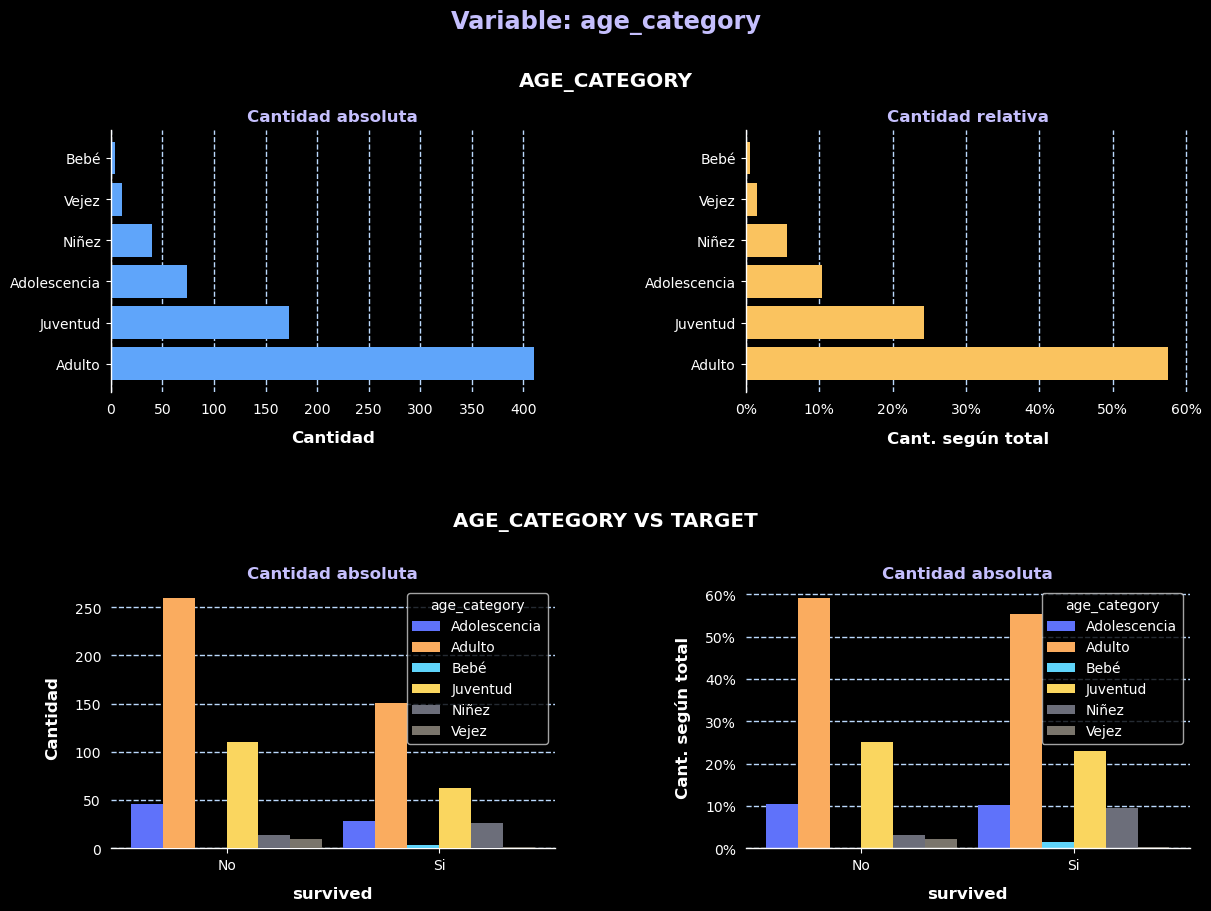

In [507]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("Variable: age_category",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.12)

##
# CATEGORY
##
font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 1.03,
		 "AGE_CATEGORY",
		 va="center",
		 ha="center",
		 fontdict=font_config)


############
# CATEGORY #
############
font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = df_training["age_category"].value_counts()
axs[0][0].barh(y=data.index,
			   width=data.values,
			   data=data,
			   color="#5FA5FA",
			   zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0][0].tick_params(axis="x", width=0)
axs[0][0].set_yticks(ticks=data.index)
#axs[0][0].set_xlabel("age_category", labelpad=10, fontdict=font_config)

axs[0][0].set_xlabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0][0].grid(axis="x",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)
axs[0][0].spines[["bottom", "top", "right"]].set_visible(False)
axs[0][0].spines["left"].set_linewidth(1)




font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0][1].set_title("Cantidad relativa", color="#C5BFFD", fontdict=font_config)

data = df_training["age_category"].value_counts(normalize=True)
axs[0][1].barh(y=data.index,
			  width=data.values,
			  data=data,
			  color="#FAC35F",
			  zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
#axs[0][1].set_xticks(ticks=data.index)
axs[0][1].set_yticks(ticks=data.index)
#axs[0][1].set_xlabel("age_category", labelpad=10, fontdict=font_config)

axs[0][1].set_xlabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[0][1].tick_params(axis="x", width=0)
axs[0][1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[0][1].grid(axis="x",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[0][1].spines[["bottom", "top", "right"]].set_visible(False)
axs[0][1].spines["left"].set_linewidth(1)




######################
# CATEGORY VS TARGET #
######################
colors = ["#5F72FA", "#FAAC5F", "#5FD4FA", "#FAD65F", "#6C6E7A", "#7A756C"]

font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "black"
}
fig.text(0.5, 0.48,
		 "AGE_CATEGORY VS TARGET",
		 va="center",
		 ha="center",
		 fontdict=font_config)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][0].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)


data = target_groupby_category("survived", "age_category", df_training, relative=False)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.15
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][0].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=3)

axs[1][0].tick_params(axis="y", width=0)
axs[1][0].set_xticks(ticks=x + (width/0.4), labels=["No", "Si"])

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][0].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)

axs[1][0].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][0].spines[["left", "top", "right"]].set_visible(False)
axs[1][0].spines["bottom"].set_linewidth(1)
axs[1][0].legend(title="age_category")





font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1][1].set_title("Cantidad absoluta", color="#C5BFFD", fontdict=font_config)

data = target_groupby_category("survived", "age_category", df_training, relative=True)
target = data.index
categories = data.columns
x = np.arange(len(target))

width = 0.15
for index, label in enumerate(categories):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = axs[1][1].bar(x=x + offset,
						  height=to_plot.values,
						  data=to_plot,
						  label=label,
						  facecolor=colors[index],
						  width=width,
						  zorder=2)

axs[1][1].tick_params(axis="y", width=0)
axs[1][1].set_xticks(ticks=x + (width/0.4), labels=["No", "Si"])


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1][1].set_xlabel("survived", labelpad=10, fontdict=font_config)
axs[1][1].set_ylabel("Cant. según total", labelpad=10, fontdict=font_config)
axs[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

axs[1][1].grid(axis="y",
			   alpha=1,
			   color="#BBD9FD",
			   linestyle="dashed",
			   linewidth=1)

axs[1][1].spines[["left", "top", "right"]].set_visible(False)
axs[1][1].spines["bottom"].set_linewidth(1)
axs[1][1].legend(title="age_category")

fig.get_layout_engine().set(hspace=0.3, wspace=0.15)
plt.show()

#### Análisis de `FARE`

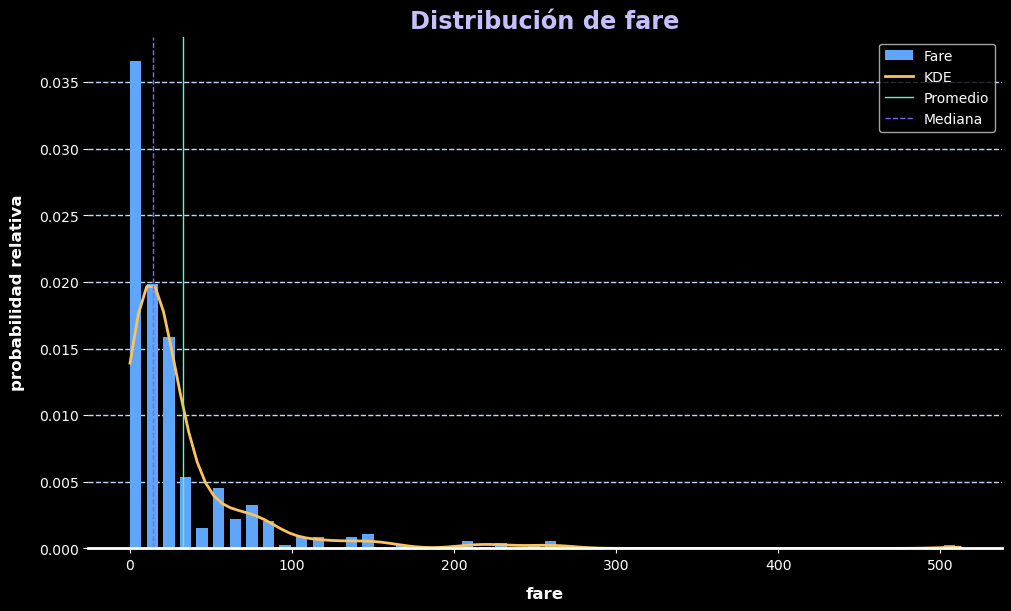

In [508]:
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
ax.set_title("Distribución de fare", color="#C5BFFD", fontdict=font_config)
ax.hist(x="fare",
		data=df_training,
		bins=50,
		density=True,
		color="#5FA5FA",
		label="Fare",
		width=7,
		zorder=2)

x = np.linspace(df_training["fare"].min(), df_training["fare"].max(), 100)
kde = stats.gaussian_kde(df_training["fare"])
ax.plot(x, kde(x), color="#FAC35F", linewidth=2, label="KDE")

age_mean = df_training["fare"].mean()
ax.axvline(x=age_mean,
		   linestyle="solid",
		   linewidth=1,
		   color="#52FACC",
		   label="Promedio")

age_median = df_training["fare"].median(),
ax.axvline(x=age_median,
		   linestyle="dashed",
		   linewidth=1,
		   color="#7969FB",
		   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.set_xlabel("fare", labelpad=10, fontdict=font_config)
ax.set_ylabel("probabilidad relativa", labelpad=10, fontdict=font_config)
ax.grid(axis="y", alpha=1, color="#BBD9FD", linestyle="dashed", linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.legend()

plt.show()

### 8) Tratamiento

**8. Trata las variables para que funcionen lo mejor posible en el modelo.**

In [509]:
df_training_bk = df_training.copy()
df_test_bk = df_test.copy()

In [510]:
df_training = df_training_bk.copy()
df_test = df_test_bk.copy()

Eliminamos las variables que poseen información duplicada.

In [511]:
df_training.reset_index(drop=True, inplace=True)
df_training.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,age_category
0,1,2,female,29.0,1,0,26.0000,Second,woman,Southampton,yes,False,Juventud
1,1,1,female,56.0,0,1,83.1583,First,woman,Cherbourg,yes,False,Adulto
2,0,2,male,60.0,1,1,39.0000,Second,man,Southampton,no,False,Adulto
3,1,3,female,22.0,0,0,7.7500,Third,woman,Southampton,yes,True,Juventud
4,0,2,male,36.0,0,0,13.0000,Second,man,Southampton,no,True,Adulto


In [512]:
to_delete = ["pclass", "alive", "who"]
df_training.drop(columns=to_delete, inplace=True)
df_training.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,age_category
0,1,female,29.0,1,0,26.0000,Second,Southampton,False,Juventud
1,1,female,56.0,0,1,83.1583,First,Cherbourg,False,Adulto
2,0,male,60.0,1,1,39.0000,Second,Southampton,False,Adulto
3,1,female,22.0,0,0,7.7500,Third,Southampton,True,Juventud
4,0,male,36.0,0,0,13.0000,Second,Southampton,True,Adulto


#### Encoding
##### `OneHotEncoder`

Codificamos las variables `sex`, `embark_town` y `alone` con `OneHotEncoder`.

In [513]:
columns_to_encode = ["sex", "embark_town", "alone"]

one_hot_encoder = preprocessing.OneHotEncoder()
data = one_hot_encoder.fit_transform(df_training[columns_to_encode])
categories = one_hot_encoder.get_feature_names_out()

encoding = pd.DataFrame(data.toarray(), columns=categories)
df_training = pd.concat([df_training, encoding], axis=1)
df_training.drop(columns=columns_to_encode, inplace=True)
df_training.head()

,survived,age,sibsp,parch,fare,class,age_category,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,1,29.0,1,0,26.0000,Second,Juventud,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,56.0,0,1,83.1583,First,Adulto,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,60.0,1,1,39.0000,Second,Adulto,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,22.0,0,0,7.7500,Third,Juventud,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,36.0,0,0,13.0000,Second,Adulto,0.0,1.0,0.0,0.0,1.0,0.0,1.0


##### `OrdinalEncoder`
Ahora realizamos la codificación de variables ordinales, como pueden ser `age_category` y `class`.

In [514]:
class_ordinal = ["First", "Second", "Third"]
age_ordinal = ["Bebé", "Niñez", "Adolescencia", "Juventud", "Adulto", "Vejez"]

In [515]:
ordinal_encoder = preprocessing.OrdinalEncoder(categories=[class_ordinal,
														   age_ordinal])
ordinal_encoder.fit(X=df_training[["class", "age_category"]])
data = ordinal_encoder.transform(df_training[["class", "age_category"]])
columns = ordinal_encoder.get_feature_names_out()

df_training["class"] = pd.Series(data[:,0], name="class")
df_training["age_category"] = pd.Series(data[:,1], name="age_category")
df_training.head()

,survived,age,sibsp,parch,fare,class,age_category,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,1,29.0,1,0,26.0000,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,56.0,0,1,83.1583,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,60.0,1,1,39.0000,1.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,22.0,0,0,7.7500,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,36.0,0,0,13.0000,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


#### Opcional: Escalado de features

Realizamos un escalado de `age` y `fare` utilizando `StandardScaler`.

In [214]:
scaler = preprocessing.StandardScaler()
scaler.fit(df_training[["age", "fare"]])
data = scaler.transform(df_training[["age", "fare"]])

df_training["age"] = pd.Series(data[:,0], name="age")
df_training["fare"] = pd.Series(data[:,1], name="fare")
df_training.head()

,survived,age,sibsp,parch,fare,class,age_category,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,1,-0.115434,1,0,-0.135157,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,1.984829,0,1,1.036265,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,2.295979,1,1,0.131270,1.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,-0.659946,0,0,-0.509179,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,0.429079,0,0,-0.401583,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


#### Transformaciones en Test

Aplicamos las transformaciones en el test

In [516]:
df_test["age_category"] = df_test["age"].apply(categorize_age)
df_test.reset_index(drop=True, inplace=True)

In [517]:
to_delete = ["pclass", "alive", "who"]
df_test.drop(columns=to_delete, inplace=True)

# ONE HOT ENCODER
columns_to_encode = ["sex", "embark_town", "alone"]

one_hot_encoder = preprocessing.OneHotEncoder()
data = one_hot_encoder.fit_transform(df_test[columns_to_encode])
categories = one_hot_encoder.get_feature_names_out()

encoding = pd.DataFrame(data.toarray(), columns=categories)
df_test = pd.concat([df_test, encoding], axis=1)
df_test.drop(columns=columns_to_encode, inplace=True)

# ORDINAL ENCODER
class_ordinal = ["First", "Second", "Third"]
age_ordinal = ["Bebé", "Niñez", "Adolescencia", "Juventud", "Adulto", "Vejez"]

ordinal_encoder = preprocessing.OrdinalEncoder(categories=[class_ordinal,
														   age_ordinal])
ordinal_encoder.fit(X=df_test[["class", "age_category"]])
data = ordinal_encoder.transform(df_test[["class", "age_category"]])
columns = ordinal_encoder.get_feature_names_out()

df_test["class"] = pd.Series(data[:,0], name="class")
df_test["age_category"] = pd.Series(data[:,1], name="age_category")

### Modelo de regresión logística

In [518]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, \
		classification_report, confusion_matrix, roc_curve, auc

In [599]:
target = ["survived"]
features = df_training.columns.difference(other=target)

##### Modelo Base

Nuestro modelo base va a ser testeado con `max_iter=1000`. Como métrica buscamos mejorar el `roc_auc`.

In [600]:
logistic_regression = LogisticRegression(random_state=9, max_iter=1000)
logistic_regression.fit(df_training[features], df_training["survived"])

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",9
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [601]:
intercept = logistic_regression.intercept_
print("Ordenada al origen:", intercept)

coeficientes = logistic_regression.coef_.ravel()
coeficientes = pd.Series(data=coeficientes,
						 index=df_training[features].columns,
						 name="coeficientes")
pd.DataFrame(coeficientes, index=df_training[features].columns)

Ordenada al origen: [2.99912025]


,coeficientes
age,-0.026136
age_category,-0.219185
alone_False,0.361963
alone_True,-0.366535
class,-0.946474
embark_town_Cherbourg,0.171789
embark_town_Queenstown,0.067383
embark_town_Southampton,-0.243743
fare,0.001790
parch,-0.218801


Al analizar los coeficientes, podemos ver que `fare`, `age` y `Queenstown` son variables con poca importancia en nuestro modelo. Solo eliminamos las dos primeras.

In [603]:
train_predicts = logistic_regression.predict(df_training[features])

###### Metrics del modelo

`Precision`, `Recall`, `F1-Score`, `Accuracy`, etc.

In [604]:
#from pprint import pprint
print(classification_report(df_training[target], train_predicts))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       439
           1       0.79      0.71      0.75       273

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712



###### Confusion Matrix

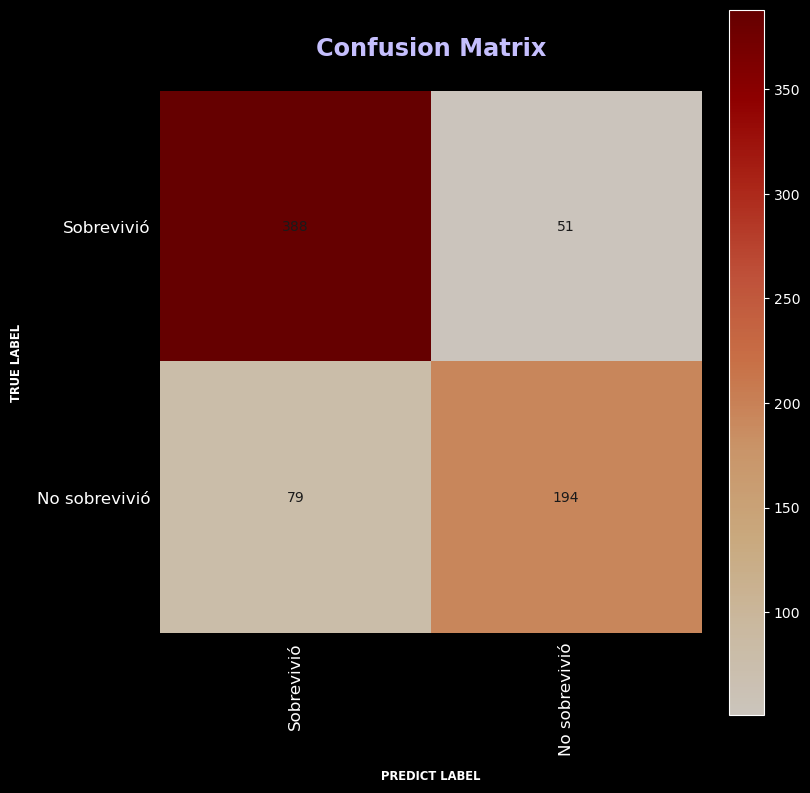

In [605]:
cmatrix = confusion_matrix(df_training["survived"], train_predicts)
correlations = pd.DataFrame(cmatrix,
							columns=["Sobrevivió", "No sobrevivió"],
							index=["Sobrevivió", "No sobrevivió"])

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, ax = plt.subplots(figsize=(8, 8), layout="constrained")
ax.set_title("Confusion Matrix",
			 color="#C5BFFD",
			 y=1.05,
			 fontdict=font_config)

# HEATMAP
hm = ax.imshow(X=correlations, alpha=0.8, cmap="OrRd")

font_config = {
	"family": "sans-serif",
	"size": "small",
	"weight": "bold"
}
ax.set_xlabel("PREDICT LABEL", labelpad=10, fontdict=font_config)
ax.set_ylabel("TRUE LABEL", labelpad=10, fontdict=font_config)

# COLORBAR
cbar = ax.figure.colorbar(hm, ax=ax)
cbar.ax.set_ylabel("", rotation=-90, ha="center", va="bottom")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "medium"
}
ax.set_xticks(ticks=range(0, len(correlations.columns)),
			  labels=correlations.columns,
			  fontdict=font_config,
			  rotation=90)
ax.set_yticks(ticks=range(0, len(correlations.columns)),
			  labels=correlations.columns,
			  fontdict=font_config)
ax.tick_params(axis="both", width=0)

for i in range(correlations.shape[0]):
	for j in range(correlations.shape[1]):
		correlation = round(correlations.iloc[i, j], 3)
		text = ax.text(j, i, correlation,
					   horizontalalignment="center",
					   verticalalignment="center",
					   color="#1A1A1A")

ax.spines[["left", "top", "right", "bottom"]].set_visible(False)

plt.show()

###### ROC Curve y AUC

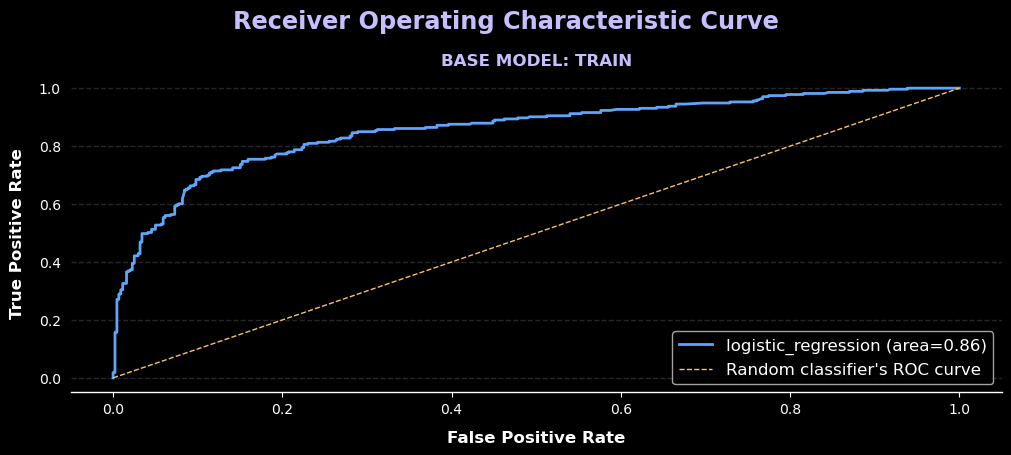

In [606]:
scores = logistic_regression.predict_proba(df_training[features])
fpr, tpr, thresholds = roc_curve(df_training[target], scores[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 4), layout="constrained")

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("Receiver Operating Characteristic Curve",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
ax.set_title("BASE MODEL: TRAIN",
			 color="#C5BFFD",
			 ha="center",
			 fontdict=font_config)

ax.plot(fpr,
		tpr,
		linewidth=2,
		color="#5FA5FA",
		label=f"logistic_regression (area={roc_auc:0.2f})")
ax.plot([0, 1],
		[0, 1],
		linewidth=1,
		linestyle="dashed",
		color="#FAC35F",
		label="Random classifier's ROC curve")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.tick_params(axis="y", width=0)

ax.set_xlabel("False Positive Rate", labelpad=10, fontdict=font_config)
ax.set_ylabel("True Positive Rate", labelpad=10, fontdict=font_config)
ax.grid(axis="y",
		color="#262626",
		linestyle="dashed",
		linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(1)

plt.legend(loc="lower right", fontsize=12)
plt.show()

###### Test

In [607]:
test_predicts = logistic_regression.predict(df_test[features])
print(classification_report(df_test[target], test_predicts))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.71      0.75      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



En general, las métricas son peores que en nuestro training set.

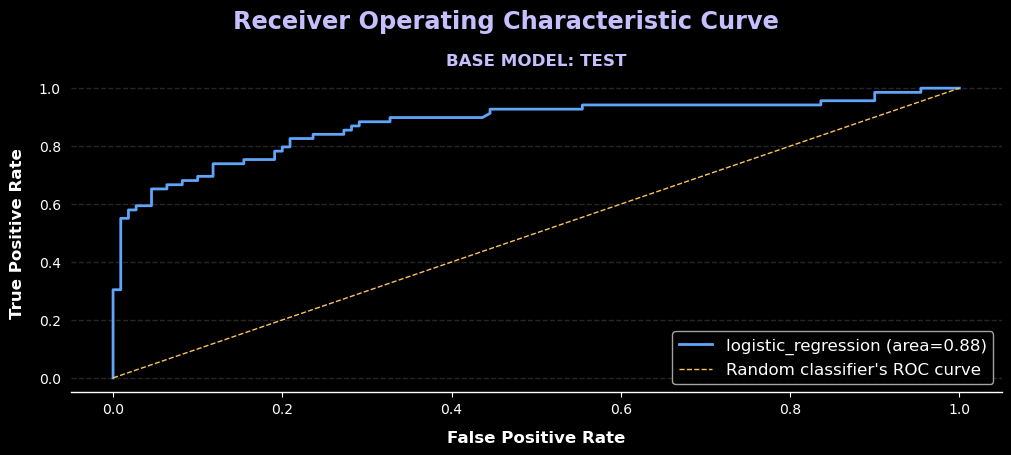

In [608]:
scores = logistic_regression.predict_proba(df_test[features])
fpr, tpr, thresholds = roc_curve(df_test[target], scores[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 4), layout="constrained")

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("Receiver Operating Characteristic Curve",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
ax.set_title("BASE MODEL: TEST",
			 color="#C5BFFD",
			 ha="center",
			 fontdict=font_config)

ax.plot(fpr,
		tpr,
		linewidth=2,
		color="#5FA5FA",
		label=f"logistic_regression (area={roc_auc:0.2f})")
ax.plot([0, 1],
		[0, 1],
		linewidth=1,
		linestyle="dashed",
		color="#FAC35F",
		label="Random classifier's ROC curve")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.tick_params(axis="y", width=0)

ax.set_xlabel("False Positive Rate", labelpad=10, fontdict=font_config)
ax.set_ylabel("True Positive Rate", labelpad=10, fontdict=font_config)
ax.grid(axis="y",
		color="#262626",
		linestyle="dashed",
		linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(1)

plt.legend(loc="lower right", fontsize=12)
plt.show()

`auc_roc` tiene una mejora: **0.88**

###### Conclusión

**MODELO BASE: TRAIN**

---
`ROC_AUC` es **0.86**.
```bash
              precision    recall  f1-score   support
           0       0.83      0.88      0.86       439
           1       0.79      0.71      0.75       273

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712
```

**MODELO BASE: TEST**

---
`ROC_AUC` es **0.88**.
```bash
              precision    recall  f1-score   support
           0       0.84      0.81      0.82       110
           1       0.71      0.75      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179
```

Nuestra métrica `roc_auc` es mejor en el conjunto de test... El modelo parece estar, ligeramente, sobreajustado al conjunto de datos de entrenamiento.

##### `LogisticRegression`

Vamos a tratar de entrenar un modelo con mejor performance y en lo posible, una mejora en nuestra métrica objetivo.

In [539]:
from sklearn.model_selection import GridSearchCV

In [610]:
columns = ["age", "fare", "survived"]
features = df_training.columns.difference(other=columns)

logistic_regression = LogisticRegression(random_state=7)

In [585]:
param_grid = [
	# L1
	{
		"C": np.logspace(-3, 2, 20),
		"l1_ratio": [1.0],
		"solver": ["liblinear", "saga"],
		"max_iter": [1000, 1000, 5000]
	},
	# L2
	{
		"C": np.logspace(-3, 2, 20),
		"l1_ratio": [0.0],
		"solver": [
			"lbfgs",
			"liblinear",
			"newton-cg",
			"newton-cholesky",
			"sag",
			"saga"
		],
		"max_iter": [1000, 5000, 10000]
	},
	# ElasticNet
	{
		"C": np.logspace(-3, 2, 20),
		"l1_ratio": np.linspace(0.1, 0.9, 5),
		"solver": ["saga"],
		"max_iter": [1000, 5000, 10000]
	},
	# No regularización
	{
		"C": np.logspace(-3, 2, 20),
		"solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
		"max_iter": [1000, 5000, 10000]
	}
]

grid_search = GridSearchCV(logistic_regression,
						   param_grid,
						   n_jobs=-1,
						   scoring="roc_auc",
						   cv=10)
grid_search.fit(df_training[features], df_training[target].values.ravel())

/home/p0lybius/miniconda3/envs/dataScience/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/p0lybius/miniconda3/envs/dataScience/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/p0lybius/miniconda3/envs/dataScience/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/p0lybius/miniconda3/envs/dataScience/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/p0lybius/miniconda3/envs/dataScience/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...andom_state=7)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'C': array([1.0000...00000000e+02]), 'l1_ratio': [1.0], 'max_iter': [1000, 1000, ...], 'solver': ['liblinear', 'saga']}, {'C': array([1.0000...00000000e+02]), 'l1_ratio': [0.0], 'max_iter': [1000, 5000, ...], 'solver': ['lbfgs', 'liblinear', ...]}, ...]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fol

Revisamos los mejores parámetros de nuestro modelo.

In [611]:
grid_search.best_params_

{'C': np.float64(0.42813323987193913),
 'l1_ratio': 0.0,
 'max_iter': 1000,
 'solver': 'liblinear'}

In [612]:
logistic_regression = LogisticRegression(C=np.float64(0.42813323987193913),
										 l1_ratio=0.0,
										 solver="liblinear",
										 max_iter=1000,
										 random_state=7)
logistic_regression.fit(df_training[features], df_training[target].values.ravel())

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",np.float64(0....3323987193913)
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",7
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of p

##### Análisis del modelo final

In [613]:
intercept = logistic_regression.intercept_
print("Ordenada al origen:", intercept)

coeficientes = logistic_regression.coef_.ravel()
coeficientes = pd.Series(data=coeficientes,
						 index=df_training[features].columns,
						 name="coeficientes")
pd.DataFrame(coeficientes, index=df_training[features].columns)

Ordenada al origen: [1.04651797]


,coeficientes
age_category,-0.356609
alone_False,0.854356
alone_True,0.192161
class,-0.814012
embark_town_Cherbourg,0.569371
embark_town_Queenstown,0.353709
embark_town_Southampton,0.123439
parch,-0.166845
sex_female,1.731232
sex_male,-0.684714


In [615]:
train_predicts = logistic_regression.predict(df_training[features])
print(classification_report(df_training[target], train_predicts))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       439
           1       0.78      0.69      0.73       273

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



###### Confusion Matrix

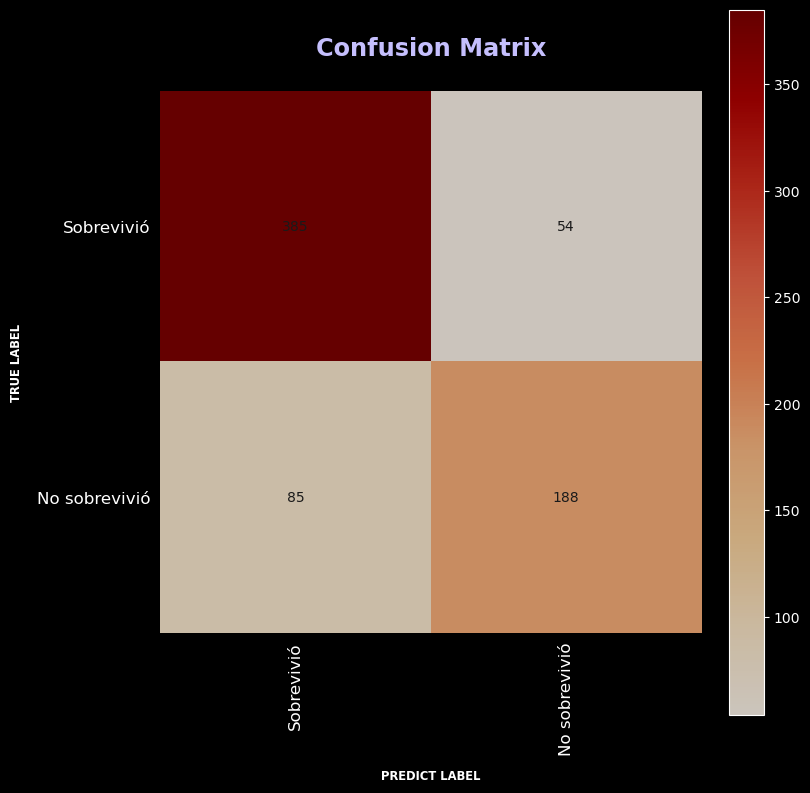

In [616]:
cmatrix = confusion_matrix(df_training[target], train_predicts)
correlations = pd.DataFrame(cmatrix,
							columns=["Sobrevivió", "No sobrevivió"],
							index=["Sobrevivió", "No sobrevivió"])

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, ax = plt.subplots(figsize=(8, 8), layout="constrained")
ax.set_title("Confusion Matrix",
			 color="#C5BFFD",
			 y=1.05,
			 fontdict=font_config)

# HEATMAP
hm = ax.imshow(X=correlations, alpha=0.8, cmap="OrRd")

font_config = {
	"family": "sans-serif",
	"size": "small",
	"weight": "bold"
}
ax.set_xlabel("PREDICT LABEL", labelpad=10, fontdict=font_config)
ax.set_ylabel("TRUE LABEL", labelpad=10, fontdict=font_config)

# COLORBAR
cbar = ax.figure.colorbar(hm, ax=ax)
cbar.ax.set_ylabel("", rotation=-90, ha="center", va="bottom")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "medium"
}
ax.set_xticks(ticks=range(0, len(correlations.columns)),
			  labels=correlations.columns,
			  fontdict=font_config,
			  rotation=90)
ax.set_yticks(ticks=range(0, len(correlations.columns)),
			  labels=correlations.columns,
			  fontdict=font_config)
ax.tick_params(axis="both", width=0)

for i in range(correlations.shape[0]):
	for j in range(correlations.shape[1]):
		correlation = round(correlations.iloc[i, j], 3)
		text = ax.text(j, i, correlation,
					   horizontalalignment="center",
					   verticalalignment="center",
					   color="#1A1A1A")

ax.spines[["left", "top", "right", "bottom"]].set_visible(False)

plt.show()

###### ROC Curve y AUC

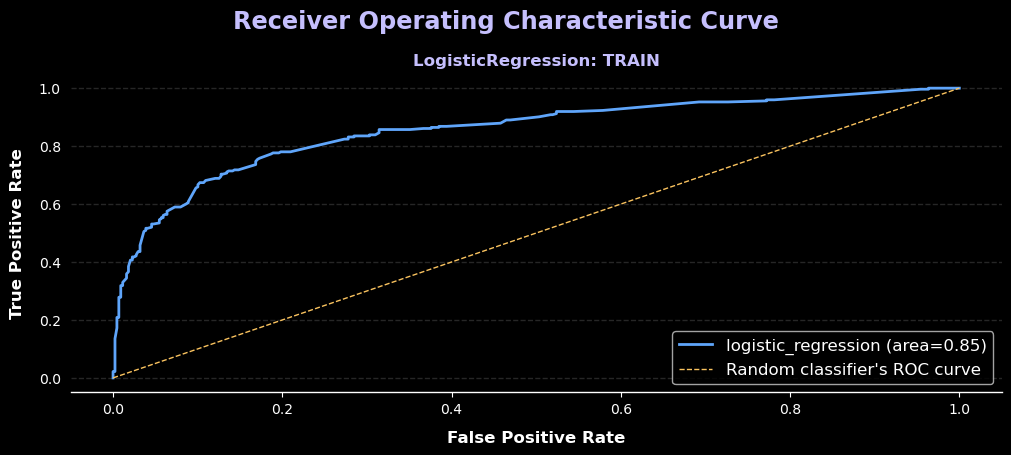

In [617]:
scores = logistic_regression.predict_proba(df_training[features])
fpr, tpr, thresholds = roc_curve(df_training[target], scores[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 4), layout="constrained")

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("Receiver Operating Characteristic Curve",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
ax.set_title("LogisticRegression: TRAIN",
			 color="#C5BFFD",
			 ha="center",
			 fontdict=font_config)


ax.plot(fpr,
		tpr,
		linewidth=2,
		color="#5FA5FA",
		label=f"logistic_regression (area={roc_auc:0.2f})")
ax.plot([0, 1],
		[0, 1],
		linewidth=1,
		linestyle="dashed",
		color="#FAC35F",
		label="Random classifier's ROC curve")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.tick_params(axis="y", width=0)

ax.set_xlabel("False Positive Rate", labelpad=10, fontdict=font_config)
ax.set_ylabel("True Positive Rate", labelpad=10, fontdict=font_config)
ax.grid(axis="y",
		color="#262626",
		linestyle="dashed",
		linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(1)

plt.legend(loc="lower right", fontsize=12)
plt.show()

Nuestro `auc_roc` es igual **0.85**.

###### Test

Testeamos el modelo.

In [618]:
test_predicts = logistic_regression.predict(df_test[features])
print(classification_report(df_test[target], test_predicts))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



###### ROC Curve y AUC

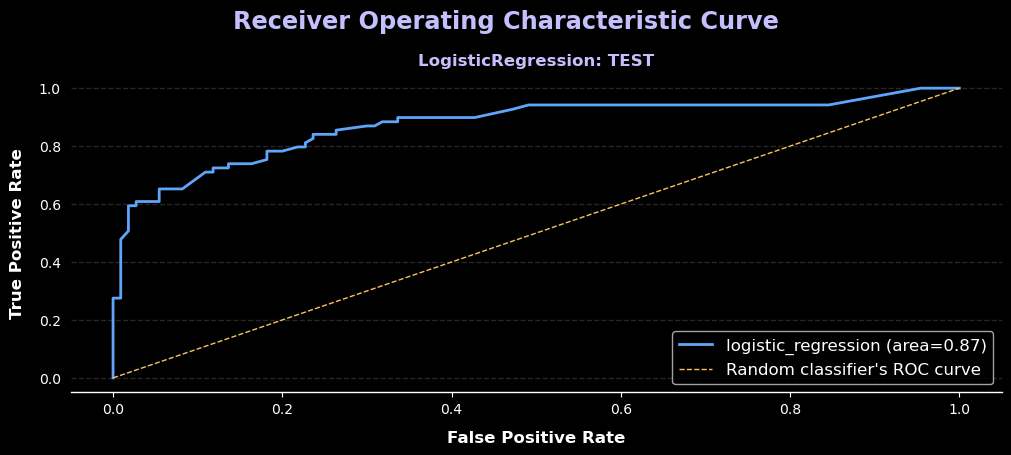

In [620]:
scores = logistic_regression.predict_proba(df_test[features])
fpr, tpr, thresholds = roc_curve(df_test[target], scores[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 4), layout="constrained")

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("Receiver Operating Characteristic Curve",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
ax.set_title("LogisticRegression: TEST",
			 color="#C5BFFD",
			 ha="center",
			 fontdict=font_config)

ax.plot(fpr,
		tpr,
		linewidth=2,
		color="#5FA5FA",
		label=f"logistic_regression (area={roc_auc:0.2f})")
ax.plot([0, 1],
		[0, 1],
		linewidth=1,
		linestyle="dashed",
		color="#FAC35F",
		label="Random classifier's ROC curve")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.tick_params(axis="y", width=0)

ax.set_xlabel("False Positive Rate", labelpad=10, fontdict=font_config)
ax.set_ylabel("True Positive Rate", labelpad=10, fontdict=font_config)
ax.grid(axis="y",
		color="#262626",
		linestyle="dashed",
		linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(1)

plt.legend(loc="lower right", fontsize=12)
plt.show()

Nuestro `auc_roc` es ligeramente mejor: **0.87**

###### Conclusión

Repasamos nuestras métricas en este modelo final.

**LinearRegression: TRAIN**

---
`ROC_AUC` es **0.85**.
```bash
              precision    recall  f1-score   support
           0       0.82      0.88      0.85       439
           1       0.78      0.69      0.73       273

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712
```


**LinearRegression: TEST**

---
`ROC_AUC` es **0.87**.
```bash
              precision    recall  f1-score   support
           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179
```

El modelo generaliza bien pero penaliza a los sobrevivientes. Nuestro `accuracy` es correcto y nuestro `roc_auc` aumenta en nuestro test.